# 6.7 正则化超参数

决策树极少对训练数据做出假设（比如线性模型就正好相反，它显然假设数据是线性的）。如果不加以限制，树的结构将跟随训练集变化，严密拟合，并且很可能过拟合。这种模型通常被称为**非参数模型**，这不是说它不包含任何参数（事实上它通常有很多参数），而是指在训练之前没有确定参数的数量，导致模型结构自由而紧密地贴近数据。相反，参数模型（比如线性模型）则有预先设定好的一部分参数，因此其自由度受限，从而降低了过拟合的风险（但是增加了欠拟合的风险）。

为避免过拟合，需要在训练过程中降低决策树的自由度。现在你应该知道，这个过程被称为正则化。正则化超参数的选择取决于使用的模型，但是通常来说，至少可以限制决策树的最大深度。在Scikit-Learn中，这由超参数`max_depth`控制（默认值为`None`，意味着无限制）。减小`max_depth`可使模型正则化，从而降低过拟合的风险。

`DecisionTreeClassifier`类还有一些其他的参数，同样可以限制决策树的形状：`min_samples_split`（分裂前节点必须有的最小样本数）、`min_samples_leaf`（叶节点必须有的最小样本数量）、`min_weight_fraction_leaf`（与`min_samples_leaf`一样，但表现为加权实例总数的占比）、`max_leaf_nodes`（最大叶节点数量），以及`max_features`（分裂每个节点评估的最大特征数量）。增大超参数`min_*`或减小`max_*`将使模型正则化。



**还可以先不加约束地训练模型，然后再对不必要的节点进行剪枝（删除）。如果一个节点的子节点全部为叶节点，则该节点可被认为不必要，除非它所表示的纯度提升有重要的统计意义。标准统计测试（比如$X^2$测试）用来估算“提升纯粹是出于偶然”（被称为零假设）的概率。如果这个概率（称之为p值）高于一个给定阈值（通常是5%，由超参数控制），那么这个节点可被认为不必要，其子节点可被删除。直到所有不必要的节点都被删除，剪枝过程结束。**

图6-3显示了在卫星数据集上训练的两个决策树（在第5章中介绍）。左侧使用默认的超参数（即无限制）训练决策树，右侧使用`min_samples_leaf=4`进行训练。显然，左边的模型过拟合，右边的模型可能会更好地泛化。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

In [2]:
 def plot_decision_boundary(tree_clf, X, y, axes=[0, 7.5, 0, 3] ,legend=True):
     """
     绘制决策树的决策边界
     """
     x1s = np.linspace(axes[0], axes[1], 100)
     x2s = np.linspace(axes[2], axes[3], 100)
     x1, x2 = np.meshgrid(x1s, x2s)

     X_new = np.c_[x1.ravel(), x2.ravel()]
     y_pred = tree_clf.predict(X_new).reshape(x1.shape)
     custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
     plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
     custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
     plt.contour(x1, x2, y_pred, alpha=0.8, cmap=custom_cmap2)

     plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo' )
     plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs' )



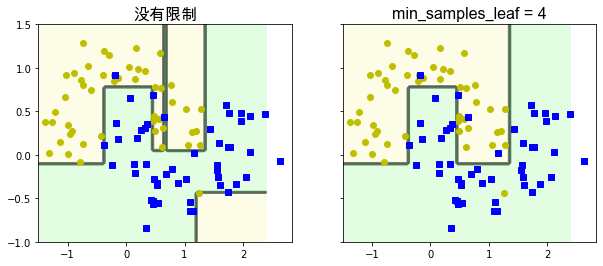

In [3]:
from matplotlib import font_manager
fontP = font_manager.FontProperties(fname="./fonts/Arial Unicode.ttf")
fontP.set_size(14)

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axis = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axis[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5])
plt.title("没有限制", fontsize=16,  fontproperties=fontP)

plt.sca(axis[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5])
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=16,  fontproperties=fontP)

plt.show()